Number of nodes: 3
Number of edges: 2
Nodes: [1, 2, 3]
Edges: [(1, 2), (2, 3)]
Subgraph nodes: [1, 2]
Complement edges: [(1, 3)]
Isomorphic: True
Adjacency matrix:
 [[0 1 0]
 [1 0 1]
 [0 1 0]]
Eulerian path: False
Hamiltonian path: False
Is planar: (True, <networkx.algorithms.planarity.PlanarEmbedding object at 0x79c43599cca0>)
Node colors: {2: 0, 1: 1, 3: 1}
Shortest path: [1, 2, 3]
Is tree: True
Minimum Spanning Tree edges: [(1, 2), (2, 3)]
Minimum Spanning Tree edges: [(1, 2), (2, 3)]
Minimum Spanning Tree weight: 3


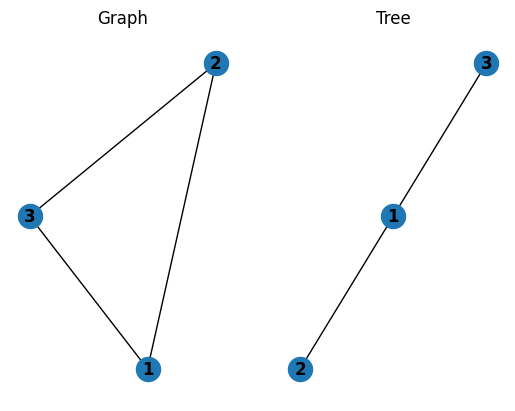

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# 3.1. Graphs

# 3.1.1. Definitions, Types, and Properties
# Define a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3])

# Add edges
G.add_edges_from([(1, 2), (2, 3)])

# Print graph properties
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", G.nodes())
print("Edges:", G.edges())

# 3.1.2. Subgraphs, Complements, and Isomorphism
# Subgraph
subgraph_nodes = [1, 2]
subgraph = G.subgraph(subgraph_nodes)
print("Subgraph nodes:", subgraph.nodes())

# Complement
complement_graph = nx.complement(G)
print("Complement edges:", complement_graph.edges())

# Isomorphism
H = nx.Graph()
H.add_nodes_from([4, 5, 6])
H.add_edges_from([(4, 5), (5, 6)])
print("Isomorphic:", nx.is_isomorphic(G, H))

# 3.1.3. Computational Representation of Graphs
# Adjacency matrix
adj_matrix = nx.adjacency_matrix(G)
print("Adjacency matrix:\n", adj_matrix.todense())

# 3.1.4. Eulerian and Hamiltonian Paths
# Eulerian path
print("Eulerian path:", nx.is_eulerian(G))

# Hamiltonian path
def has_hamiltonian_path(graph):
    def backtrack(path):
        if len(path) == len(graph.nodes()):
            return True
        for node in graph.nodes():
            if node not in path and all((node, neighbor) in graph.edges() or (neighbor, node) in graph.edges() for neighbor in path):
                if backtrack(path + [node]):
                    return True
        return False

    for node in graph.nodes():
        if backtrack([node]):
            return True
    return False

# Hamiltonian path
print("Hamiltonian path:", has_hamiltonian_path(G))

# 3.1.5. Planar Graphs
print("Is planar:", nx.check_planarity(G))

# 3.1.6. Graph Coloring
# Coloring
coloring = nx.greedy_color(G)
print("Node colors:", coloring)

# 3.1.7. Shortest Path Problems
# Shortest path
shortest_path = nx.shortest_path(G, source=1, target=3)
print("Shortest path:", shortest_path)

# 3.2. Trees

# 3.2.1. Definitions, Types, and Properties
# Define a tree
T = nx.Graph()

# Add nodes
T.add_nodes_from([1, 2, 3])

# Add edges
T.add_edges_from([(1, 2), (1, 3)])

# Check if it's a tree
print("Is tree:", nx.is_tree(T))

# 3.2.2. Rooted Trees
# Rooted tree
rooted_tree = nx.DiGraph()
rooted_tree.add_edges_from([(1, 2), (1, 3)])
rooted_tree.add_node(1)  # Add root node

# 3.2.3. Binary Search Trees
# Binary Search Tree (BST)
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

def insert(root, key):
    if root is None:
        return Node(key)
    else:
        if key < root.val:
            root.left = insert(root.left, key)
        else:
            root.right = insert(root.right, key)
    return root

# 3.2.4. Expansion Trees
# Expansion trees (e.g., Minimum Spanning Tree)
mst = nx.minimum_spanning_tree(G)
print("Minimum Spanning Tree edges:", mst.edges())

# 3.2.5. Minimal Spanning Trees
# Minimal Expansion Trees
# Create a weighted graph
G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 2), (2, 3, 1), (1, 3, 3)])

# Find the Minimum Spanning Tree (MST)
mst = nx.minimum_spanning_tree(G)

# Calculate the total weight of the MST
mst_weight = sum(d['weight'] for u, v, d in mst.edges(data=True))

print("Minimum Spanning Tree edges:", mst.edges())
print("Minimum Spanning Tree weight:", mst_weight)

# Display graphs
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.title("Graph")

plt.subplot(122)
nx.draw(T, with_labels=True, font_weight='bold')
plt.title("Tree")

plt.show()


In [10]:
import heapq

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[] for _ in range(vertices)]

    def add_edge(self, u, v, w):
        self.graph[u].append((v, w))
        self.graph[v].append((u, w))

    def prim_mst(self):
        visited = [False] * self.V
        min_heap = []
        mst_weight = 0
        mst_edges = []

        heapq.heappush(min_heap, (0, 0))  # Pushing the first vertex (weight, vertex)

        while min_heap:
            weight, vertex = heapq.heappop(min_heap)

            if not visited[vertex]:
                visited[vertex] = True
                mst_weight += weight

                for neighbor, weight in self.graph[vertex]:
                    if not visited[neighbor]:
                        heapq.heappush(min_heap, (weight, neighbor))
                        mst_edges.append((vertex, neighbor, weight))

        return mst_edges, mst_weight

# Example Usage
g = Graph(5)
g.add_edge(0, 1, 2)
g.add_edge(0, 3, 6)
g.add_edge(1, 2, 3)
g.add_edge(1, 3, 8)
g.add_edge(1, 4, 5)
g.add_edge(2, 4, 7)
g.add_edge(3, 4, 9)

mst_edges, mst_weight = g.prim_mst()
print("Minimum Spanning Tree Edges:")
for edge in mst_edges:
    print(edge)
print("Total Weight of Minimum Spanning Tree:", mst_weight)


Minimum Spanning Tree Edges:
(0, 1, 2)
(0, 3, 6)
(1, 2, 3)
(1, 3, 8)
(1, 4, 5)
(2, 4, 7)
(4, 3, 9)
Total Weight of Minimum Spanning Tree: 16
